<hr>

# Graded Project
### Machine Learning - Unsupervised Learning
<hr>

## Domain:
- E-commerce:

## Business Context:
- Customer segmentation is one of the most important marketing tools at your disposal, because it can help a business to better understand its target audience. This is because it groups customers based on common characteristics.

- Segmentation can be based on the customer’s habits and lifestyle, in particular, their buying habits. Different age groups, for example, tend to spend their money in different ways, so brands need to be aware of who exactly is buying their product

- Segmentation also focuses more on the personality of the consumer, including their opinions, interests, reviews, and rating. Breaking down a large customer base into more manageable clusters, making it easier to identify your target audience and launch campaigns and promote the business to the most relevant people

## Dataset Description:
The dataset contains measurements of clothing fit from RentTheRunway. RentTheRunWay is a unique platform that allows women to rent clothes for various occasions. The collected data is of several categories. This dataset contains self-reported fit feedback from customers as well as other side information like reviews, ratings, product categories, catalog sizes, customers’ measurements (etc.)

In [1]:
%%html
<style>
table {float:left}
</style>

## Attribute Information:

| SL.No | Attribute | Description |
|:-|:-|:-|
|1. | user_id | a unique id for the customer
|2. | item_id | unique product id
|3. | weight | weight measurement of customer
|4. | rented | for purpose clothing was rented for
|5. | body type | body type of customer
|6. | review_text | review given by the customer
|7. | size | the standardized size of the product
|8. | rating | rating for the product
|9. | age | age of the customer
|10. | category | the category of the product
|11. | bust size | bust measurement of customer
|12. | height | height of the customer
|13. | review_date | date when the review was written
|14. | fit | fit feedback

## Data Citation:
- Rishabh Misra, Mengting Wan, Julian McAuley "Decomposing Fit Semantics for Product Size Recommendation in Metric Spaces". RecSys, 2018.
- Rishabh Misra, Jigyasa Grover "Sculpting Data for ML: The first act of Machine Learning", 2021.

## Project Objective:
Based on the given users and items data of an e-commerce company, segment the similar user and items into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

<hr>
<h2>I. Import the required libraries and load the data</h2>
<hr>

#### 1. Load the required libraries and read the dataset.

In [2]:
## Loading the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage

import datetime

import warnings
warnings.filterwarnings('ignore')

In [3]:
## Reading the dataset
df = pd.read_csv(r'renttherunway.csv')

#### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [4]:
df.head(5)

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [5]:
df.shape

(192544, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

<hr>
<h2>II. Data cleansing and Exploratory Data Analysis (EDA)</h2>
<hr>

#### 3. Check if there are any duplicate records in the dataset? If any, drop them.

In [7]:
## Checking for duplicates
df[df.duplicated()]

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date


<ul>
    <li>No duplicate records present in dataset.</li>
</ul>

#### 4. Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’) 

In [8]:
df.columns

Index(['Unnamed: 0', 'fit', 'user_id', 'bust size', 'item_id', 'weight',
       'rating', 'rented for', 'review_text', 'body type', 'review_summary',
       'category', 'height', 'size', 'age', 'review_date'],
      dtype='object')

In [9]:
df.drop(['Unnamed: 0', 'user_id', 'item_id', 'review_text', 'review_summary', 'review_date'], axis=1, inplace=True)
df.head(5)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0


#### 5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs)

In [10]:
df['weight'].dtype

dtype('O')

<ul>
    <li>Column 'weight' has Object or String data type due to suffix lbs.</li>
</ul>

In [11]:
## Dropping suffix lbs and converting to float datatype
df['weight'] = df['weight'].replace({'lbs': ''}, regex=True).astype(float)
df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,"5' 9""",12,27.0


#### 6. Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'

In [12]:
## Checking unique categories for column 'rented for'
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [13]:
## Grouping 'party: cocktail' category with 'party'
party = ['party', 'party: cocktail']
df.loc[df['rented for'].isin(party), 'rented for'] = 'party'

df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

#### 7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype

In [14]:
# Splitting 'height' into feet and inches
h_split = df['height'].str.split('\'', 1)
feet = h_split.str[0].astype(float)
inches = h_split.str[1].replace({'"': ''}, regex=True).astype(float)

# Converting height to inches as float datatype 
df['height'] = ((feet*12)+inches)
df['height'].head()

0    68.0
1    66.0
2    64.0
3    65.0
4    69.0
Name: height, dtype: float64

#### 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods.

In [15]:
## Checking for missing values
(df.isnull().sum() / len(df)) * 100

fit            0.000000
bust size      9.561970
weight        15.571506
rating         0.042588
rented for     0.005194
body type      7.601899
category       0.000000
height         0.351608
size           0.000000
age            0.498587
dtype: float64

In [16]:
# Imputing missing data
missing = df.isnull().sum()/len(df)

# Getting indexes with missing values
index = [i  for i in missing[missing>0].index]


# Filling null values of numeric columns with their median values
num_col = [i     
           for i in index      
           if i in df.columns and  df[i].dtype!=object]

for col in num_col:
    df[col]=df[col].fillna(df[col].median())

    
# Filling null values of non-numeric columns with their mode values
cat_col = [i     
           for i in index      
           if i in df.columns and  df[i].dtype==object]

for col in cat_col:
    df[col]=df[col].fillna(df[col].mode()[0])
    

# Re-checking missing values
df.isnull().sum()

fit           0
bust size     0
weight        0
rating        0
rented for    0
body type     0
category      0
height        0
size          0
age           0
dtype: int64

#### 9. Check the statistical summary for the numerical and categorical columns and write your findings.

In [17]:
cat_cols = ['fit', 'bust size', 'rented for', 'body type', 'category']
df[cat_cols].describe()

,fit,bust size,rented for,body type,category
count,192544,192544,192544,192544,192544
unique,3,106,8,7,68
top,fit,34b,wedding,hourglass,dress
freq,142058,45696,57794,69986,92884


<ul>
    <li>Top Bust Size is 34b occurring 45696 times in the dataset.</li>
    <li>Top occasion Rented For is Wedding occurring 57794 times.</li>
    <li>Top Body Type is Hourglass occurring 69986 times.</li>
    <li>Top product Category is Dress occurring 92884 times.</li>
</ul>

In [18]:
num_cols = ['weight', 'rating', 'height', 'size', 'age']
df[num_cols].describe()

,weight,rating,height,size,age
count,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,137.019284,9.092758,65.309529,12.245175,33.861689
std,20.141448,1.429862,2.658857,8.494877,8.039050
min,50.000000,2.000000,54.000000,0.000000,0.000000
25%,125.000000,8.000000,63.000000,8.000000,29.000000
50%,135.000000,10.000000,65.000000,12.000000,32.000000
75%,145.000000,10.000000,67.000000,16.000000,37.000000
max,300.000000,10.000000,78.000000,58.000000,117.000000


<ul>
    <li>Average weight of customers in the dataset is 137lbs, highest being 300lbs and lowest 50lbs.</li>
    <li>Average rating given by customers for the products is around 9.1, highest being 10.0 and lowest 2.0.</li>
    <li>Average height of customers is 65.3 inches, highest being 78 inches and lowest 54 inches.</li>
    <li>Average age of customers is around 33 years, highest being 117 years and lowest 0 years for newborns or infants.</li>
    <li>Maximum age 117 years being way higher than the mean and 75 percentile values signifies the presence of outliers in the 'age' column.</li>
</ul>

#### 10. Are there outliers present in the column age? If yes, treat them with the appropriate method.

<AxesSubplot:xlabel='age'>

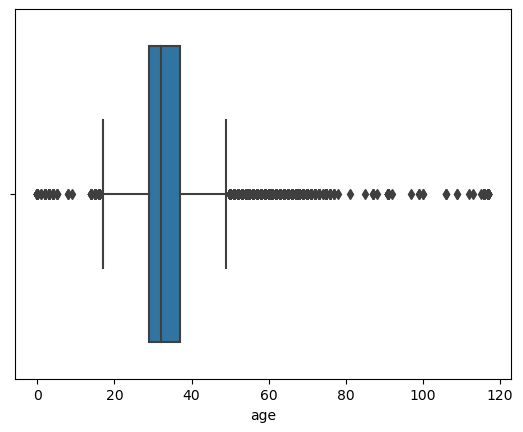

In [19]:
sns.boxplot(df['age'])

In [20]:
# calculate interquartile range
# q25, q75 = percentile(df['age'], 25), percentile(df['age'], 75)
# iqr = q75 - q25

# calculating the IQR
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

In [21]:
# calculate the outlier cutoff
# cut_off = iqr * 1.5
# lower, upper = q25 - cut_off, q75 + cut_off

# finding upper and lower limits
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

In [22]:
# identify outliers (optional)
outliers = [x for x in df['age'] if x < lower or x > upper]

In [23]:
# removing outliers above upper and below lower limits
df_cleaned = df[(df['age'] > lower) & (df['age'] < upper)]

<AxesSubplot:xlabel='age'>

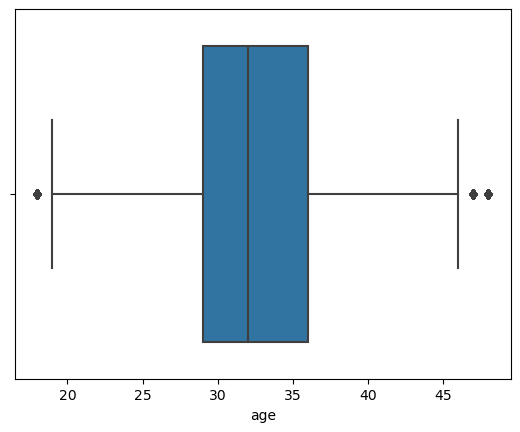

In [24]:
# plotting to check the processed data
sns.boxplot(df_cleaned['age'])

In [25]:
df_cleaned.shape

(180708, 10)

#### 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot. 

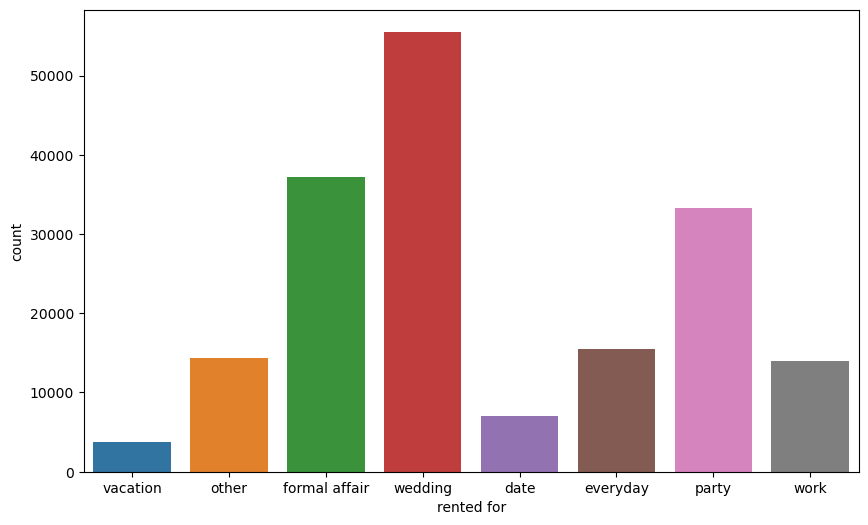

In [26]:
plt.figure(figsize=[10, 6])
sns.countplot(df_cleaned['rented for'], data=df_cleaned)
plt.show()

<hr>
<h2>III. Data Preparation for model building</h2>
<hr>

#### 12. Encode the categorical variables in the dataset.

In [27]:
# Encoding the categorical variables
df1 = df_cleaned.copy()

# Initializing Label Encoder
le = LabelEncoder()

for i in cat_cols:
    df1[i]=df1[[i]].apply(le.fit_transform).astype(np.uint8)
    
df1.head(5)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,39,137.0,10.0,5,3,44,68.0,14,28.0
1,0,37,132.0,10.0,3,6,20,66.0,12,36.0
3,0,38,135.0,8.0,2,4,16,65.0,8,34.0
4,0,37,145.0,10.0,6,1,20,69.0,12,27.0
5,0,24,138.0,8.0,0,1,16,68.0,8,45.0


#### 13. Standardize the data, so that the values are within a particular range.

In [28]:
# Standardizing the columns
ss = StandardScaler()
scaled_features = ss.fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)
scaled_features_df.head(5)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,-0.556736,0.019749,0.005616,0.636115,0.502722,0.016734,1.578752,1.008239,0.233744,-0.770121
1,-0.556736,-0.164487,-0.243981,0.636115,-0.468186,1.926154,-0.304791,0.258067,-0.004575,0.585449
3,-0.556736,-0.072369,-0.094223,-0.766053,-0.953639,0.653207,-0.618715,-0.117019,-0.481212,0.246556
4,-0.556736,-0.164487,0.404970,0.636115,0.988176,-1.256213,-0.304791,1.383325,-0.004575,-0.939568
5,-0.556736,-1.362019,0.055535,-0.766053,-1.924547,-1.256213,-0.618715,1.008239,-0.481212,2.110466


<hr>
<h2>IV. Principal Component Analysis (PCA) and Clustering</h2>
<hr>

#### 14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [29]:
# Calculating the covariance matrix
cov_matrix = np.cov(scaled_features.T)

In [30]:
# Calculating the eigen values and eigen vectors
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('Eigen values:','\n', eig_vals)
print('\n')
print('Eigen vectors:', '\n', eig_vectors)

Eigen values: 
 [2.54853006 0.25952074 0.41759257 1.24939924 0.74912887 1.07089692
 1.0171648  0.85344649 0.89070154 0.94367411]


Eigen vectors: 
 [[-0.03837486 -0.05192179  0.03705492 -0.68356875 -0.68365581  0.18217769
   0.12991802  0.09646696 -0.01726529 -0.01164287]
 [-0.4955645  -0.11872686  0.78413871  0.02046383  0.0522173  -0.04357833
  -0.17412027  0.23263751 -0.18750631 -0.0283736 ]
 [-0.54451879 -0.66802057 -0.46564613  0.05117365  0.03586367  0.04366239
   0.08414588 -0.00754893 -0.16515377 -0.01403054]
 [ 0.03811368 -0.00601287 -0.00163417  0.70127084 -0.69978091 -0.02955636
  -0.027548    0.10702787 -0.05978369  0.01931036]
 [-0.00351109  0.00379286  0.01603464  0.04346344  0.02616602  0.63429306
  -0.33832282 -0.18914308 -0.08207846  0.66169513]
 [ 0.25723893 -0.02082632  0.02557588 -0.04536541 -0.01108427 -0.02137809
  -0.08921272 -0.3409726  -0.86877703 -0.22606992]
 [ 0.0117521  -0.00727742  0.00432753 -0.09600876 -0.04133107 -0.64013722
   0.21161675  0.00265004 -0

In [31]:
# Explained Variance
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance:', var_exp)
print('\n')
print('Cumulative Explained Variance:', cum_var_exp)

Explained Variance: [25.485159554374153, 12.493923212151646, 10.708909905235009, 10.171591744157066, 9.436688926540363, 8.906966138535518, 8.534417648306473, 7.491247197156181, 4.1759025997809385, 2.5951930737626503]


Cumulative Explained Variance: [ 25.48515955  37.97908277  48.68799267  58.85958442  68.29627334
  77.20323948  85.73765713  93.22890433  97.40480693 100.        ]


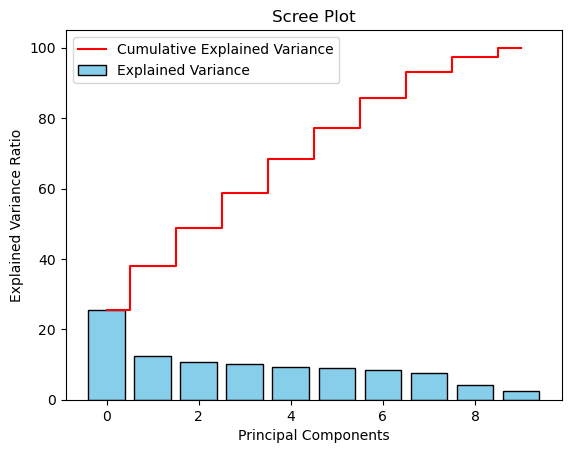

In [32]:
# Scree plot
plt.bar(range(0,len(var_exp)), var_exp, align='center', color='skyblue', edgecolor='black', label='Explained Variance')
plt.step(range(0,len(cum_var_exp)), cum_var_exp, where='mid', color='red', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

#### 15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data)
- a) Find the optimal K Value using elbow plot for K Means clustering.
- b) Build a Kmeans clustering model using the obtained optimal K value from the elbow plot.
- c) Compute silhouette score for evaluating the quality of the K Means clustering technique.

In [33]:
# Using the dimension obtained from PCA(=7) to apply clustering
pca = PCA(n_components=7)
cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df), columns=cols)
pca_df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.254624,-0.885106,0.443763,1.118021,1.502884,0.453393,-0.467509
1,-0.611452,-0.685459,0.469118,-0.454013,-0.989893,1.346863,-1.043831
2,-0.507003,0.208088,0.405883,-0.122007,-1.229187,0.143050,-0.273661
3,0.684243,-1.222617,-1.214871,1.058730,0.789641,-0.996609,-0.411327
4,-0.032911,0.302503,1.539330,-0.171990,-1.589971,-2.464334,-1.407950


In [34]:
# Finding optimal K-value by KMeans clustering using Elbow plot
cluster_errors = []
cluster_range = range(2,15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

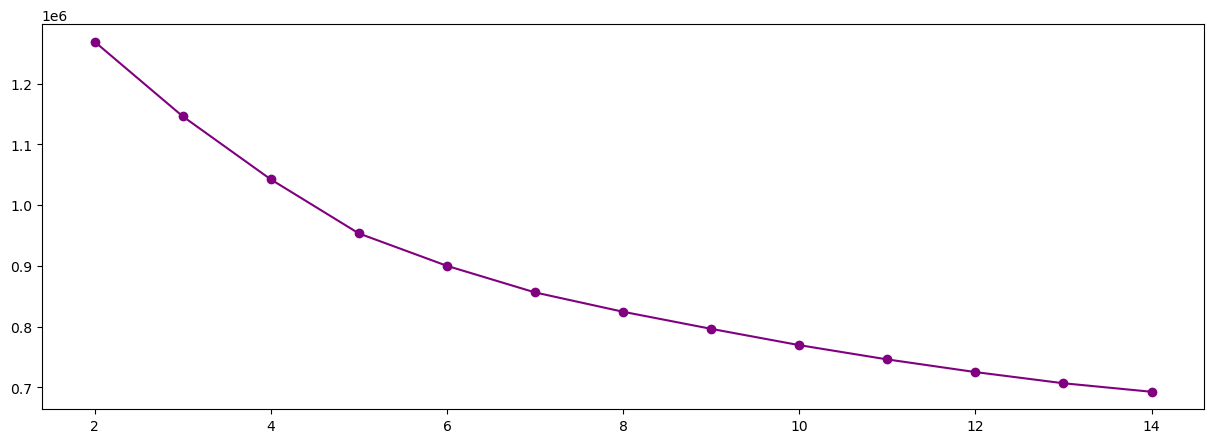

In [35]:
# Creating a dataframe of number of clusters and cluster errors
cluster_df = pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors':cluster_errors})

# Elbow plot
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'], cluster_df['cluster_errors'], marker='o', color='purple')

In [36]:
for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=100)
    kmeans.fit_predict(pca_df)
    silhouette_avg = silhouette_score(pca_df, kmeans.labels_, metric='euclidean')
    print('For n_clusters =', i,"average silhouette_score is :", silhouette_avg)

In [37]:
# Applying KMeans clustering for the optimal number of clusters obtained above
#kmeans = KMeans(n_clusters=3, random_state=100)
#kmeans.fit(pca_df)

In [38]:
# Creating a dataframe of the labels
#label = pd.DataFrame(kmeans.labels_, columns=['Label'])

In [39]:
# Joining label dataframe with the pca_df dataframe
#kmeans_df = pca_df.join(label)
#kmeans_df.head(5)

In [40]:
#kmeans_df['Label'].value_counts()

In [41]:
# Visualising the clusters formed
#sns.scatterplot(kmeans_df['PC1'], kmeans_df['PC2'], hue='Label', data=kmeans_df)
#plt.show()

#### 16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data) 

- a) Find the optimal K Value using dendrogram for Agglomerative clustering.
- b) Build a Agglomerative clustering model using the obtained optimal K value observed from dendrogram.
- c) Compute silhouette score for evaluating the quality of the Agglomerative clustering technique. (Hint: Take a sample of the dataset for agglomerative clustering to reduce the computational time)

<hr>
<h2>V. Conclusions</h2>
<hr>

#### 17. Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your conclusion on the results.